In [ ]:
pip install pandas

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])

In [ ]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.shape

(5572, 2)

In [ ]:
!pip install nltk

 install the nltk library (Natural Language Toolkit),

This command installs the nltk package, which is a powerful library for natural language processing (NLP) in Python. It includes tools for tokenization, stemming, tagging, parsing, and more, making it useful for working with text data, such as your SMS spam classification dataset.

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

This command will download a list of common stopwords (like "the," "is," "in") that can be useful for text processing. Stopwords are often removed from text data during analysis, as they typically do not add significant meaning to the text and can help reduce noise in text processing tasks, such as spam detection or sentiment analysis.

In [ ]:
sent = 'How are you friends?'

In [ ]:
nltk.download('punkt')   #this is optional required in collab not juypter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize(sent)

['How', 'are', 'you', 'friends', '?']

In [ ]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

from nltk.corpus import stopwords: Imports the stopwords module from NLTK's corpus package, which provides access to a variety of text resources, including stopwords in different languages.

stopwords.words('english'): Retrieves the list of stopwords in English, such as "the," "is," "in," etc. Stopwords are common words that often add little meaning in text analysis and are commonly removed in NLP tasks.

In [ ]:
#swords

In [ ]:
clean = [word for word in word_tokenize(sent) if word not in swords]

Filters out any word that is found in swords, which is the list of English stopwords from NLTK. Only words not in swords are kept.



In [ ]:
clean

['How', 'friends', '?']

In [ ]:
# Stemming words with NLTK
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean = [ps.stem(word) for word in word_tokenize(sent)
         if word not in swords]
clean

['how', 'friend', '?']

from nltk.stem import PorterStemmer: Imports the PorterStemmer class from NLTK, which is used to reduce words to their root form (stemming). For example, "running" might be reduced to "run".

ps = PorterStemmer(): Initializes an instance of the PorterStemmer.

ps.stem(word): Applies the stemming process to each non-stopword word using the PorterStemmer instance.

In [ ]:
sent = 'Hello friends! How are you? We will learning python today'

In [ ]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean
         if word not in swords]
    return clean
    #print(clean)

This line filters the tokens to keep only those that are either numeric (isdigit()) or alphabetic (isalpha()).

In [ ]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [ ]:
# Pre-processing
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf = TfidfVectorizer(analyzer=clean_text)


The TfidfVectorizer is a tool used to convert a collection of text documents into a matrix of TF-IDF features. TF-IDF stands for Term Frequency - Inverse Document Frequency, which is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus).

How It Works:
Term Frequency (TF): Measures how frequently a word appears in a document. If a word appears more frequently in a document, its term frequency increases.

Formula:

TF(t,d)= Number of times term t appears in document d/Total number of terms in document d
​
Inverse Document Frequency (IDF): Measures how important a word is by looking at how common it is across all documents. Words that appear in many documents (e.g., "the", "is") are considered less important because they don't help distinguish between documents.

Formula:

IDF(t)=log( Total number of documents/Number of documents containing term t)
TF-IDF Score: Combines these two measures to determine how important a term is within a document relative to the entire corpus.

Formula:

TF-IDF(t,d)=TF(t,d)×IDF(t)

Purpose of TfidfVectorizer:
The TfidfVectorizer converts the text data into a numerical matrix of TF-IDF scores, which can then be used as input for machine learning algorithms.
It helps in converting text data (like sentences or documents) into features that capture the relative importance of words in a document.

In [ ]:
x = df['text']
y = df['label']


In [ ]:
x_new = tfidf.fit_transform(x)

The transform() method will then convert the list of documents (x) into a matrix where each row corresponds to a document and each column corresponds to a word in the vocabulary. The values in the matrix represent the TF-IDF scores for each word in each document.

In [ ]:
x.shape

(5572,)

In [ ]:
x_new.shape

(5572, 6513)

In [ ]:
# Instead of using get_feature_names(), use get_feature_names_out()
tfidf.get_feature_names_out()

array(['0', '008704050406', '0089', ..., 'zyada', 'é', 'ü'], dtype=object)

This method returns a list (or array) of the feature names (words) corresponding to the columns of the TF-IDF matrix.

The words are the ones that appear in the documents after applying the tokenization and cleaning function (clean_text), which may include tasks like removing stopwords, punctuation, or applying stemming.

In [ ]:
y.value_counts()

,count
label,
ham,4825
spam,747


<Axes: xlabel='label', ylabel='count'>

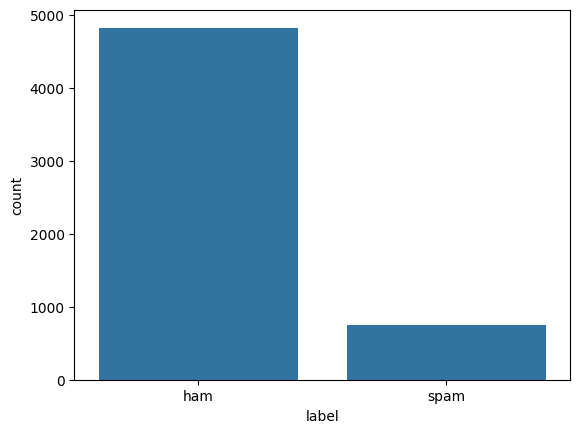

In [ ]:
import seaborn as sns
sns.countplot(x=y)

In [ ]:
#cross validation
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size=0.25,random_state=0)

In [ ]:
x_train.shape

(4179, 6513)

In [ ]:
x_test.shape

(1393, 6513)

In [ ]:
y_train.shape

(4179,)

In [ ]:
y_test.shape

(1393,)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb = GaussianNB()
# Gaussian (normal) distribution.

In [ ]:
nb.fit(x_train.toarray(),y_train)
#toarray() converts this sparse matrix into a dense NumPy array.

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(x_test.toarray())

In [ ]:
y_test.value_counts()

,count
label,
ham,1208
spam,185


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

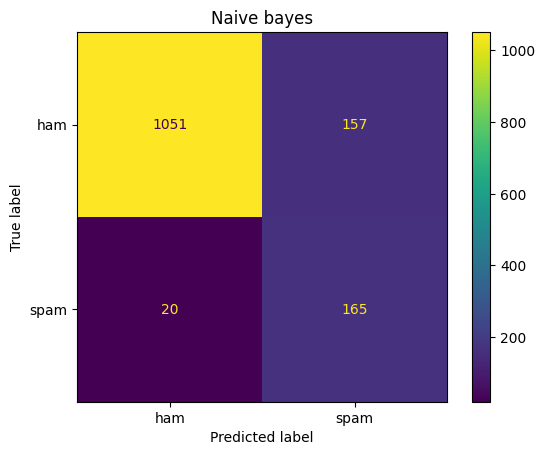

 Accuracy is 0.8729361091170137
              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
plt.title('Naive bayes')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_nb)}")
print(classification_report(y_test,y_pred_nb))

                    Predicted 0               Predicted 1

actual  0          TN                 .|.           FP  
	         .....................................................

actual  1 	         FN                .|.           TP




**Accuracy**

Accuracy is the overall correctness of the model across all classes, measuring the proportion of true results (both true positives and true negatives) out of all predictions.

Calculated as the sum of true positives and true negatives divided by the total number of samples.

**Precision**

Precision measures how many of the positive predictions made by the model are actually correct.
Calculated as the number of true positives divided by the sum of true positives and false positives.

**Recall**

Recall measures how many of the actual positives were correctly identified by the model.

Calculated as the number of true positives divided by the sum of true positives and false negatives.

**F1 Score**

The F1-score is the harmonic mean of precision and recall. It balances the two metrics, offering a single performance metric when you want to find a compromise between precision and recall.

Calculated as 2 * (Precision * Recall) / (Precision + Recall).

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rf.predict(x_test) #float

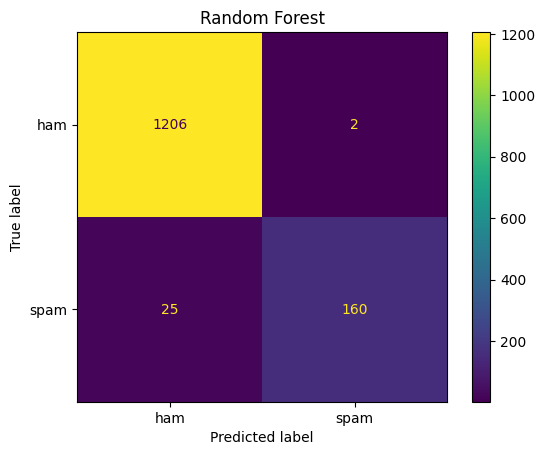

 Accuracy is 0.9806173725771715
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=1)

model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)

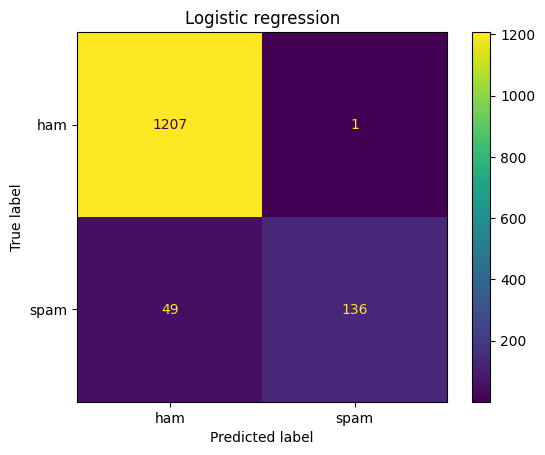

 Accuracy is 0.9641062455132807
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.74      0.84       185

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

===============================

Hyper parameter tunning


Hyperparameter tuning is the process of finding the best set of hyperparameters for a machine learning model to improve its performance.

Key Points:

Hyperparameters are settings or configurations that control the learning process but are not learned from the data itself (e.g., learning rate, number of trees in a random forest, or the regularization strength).

Tuning means adjusting these hyperparameters to find the combination that gives the best results (e.g., highest accuracy, lowest error) for your model.
Example:
If you're training a machine learning model like a decision tree, you might tune hyperparameters like:

Max depth of the tree
Min samples per leaf
By testing different combinations of these values, you can improve the model's accuracy or reduce overfitting. Grid search and random search are common techniques for hyperparameter tuning.

In Short:
Hyperparameter tuning helps you fine-tune the settings of your model to make it perform better on your specific data.

In [ ]:
from sklearn.model_selection import GridSearchCV

GridSearchCV is a powerful method for performing hyperparameter tuning in machine learning models. It helps in finding the best combination of hyperparameters for a given model to improve its performance.

What is Grid Search?
Grid Search is an exhaustive search method that tries all possible combinations of the specified hyperparameters for a model, evaluating the model's performance for each combination using cross-validation.

Cross-Validation (CV): The model is trained and tested on different subsets of the data to ensure that the performance is evaluated on different portions of the dataset, reducing the risk of overfitting.

In [ ]:
params = {

    'criterion':['gini', 'entropy','log_loss'],
     'max_features': ['sqrt','log2'],
     'random_state': [0,1,2,3,4],
    'class_weight':['balanced','balanced_subsample']
}

defined a dictionary named params which contains a set of hyperparameters for tuning a machine learning model. Specifically, these parameters are likely meant for tuning a decision tree model (or similar tree-based models, like a Random Forest or Gradient Boosting), as they relate to tree construction and evaluation criteria.

Explanation of the params dictionary:

'criterion': This defines the function used to evaluate the quality of a split in the tree.


'gini' is the Gini impurity, which measures the "impurity" of a node.

'entropy' is the information gain, which is another metric used to split nodes.

'log_loss' (typically used in classification problems) is the log loss or logistic loss, which measures the difference between the true labels and predicted probabilities.

'max_features': This controls the number of features to consider when looking for the best split.


'sqrt' means the square root of the number of features will be considered at each split (common in random forests).

'log2' means the log base 2 of the number of features will be considered.

'random_state': This parameter controls the randomness of the model (ensuring reproducibility). Different values like 0, 1, 2, 3, 4 allow you to experiment with different random seeds for the model's initialization.


'class_weight': This parameter is used to handle imbalanced class distributions. It adjusts the weight of each class in the decision-making process.

'balanced' adjusts weights inversely proportional to class frequencies.

'balanced_subsample' is used in some models like Random Forests to balance the class weights based on the bootstrap sample.

In [ ]:
grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [ ]:
rf = grid.best_estimator_

grid.best_estimator_: This is an attribute of the GridSearchCV object, and it holds the best model found during the grid search. After calling grid.fit(x_train, y_train), best_estimator_ contains the model that achieved the best performance according to the cross-validation and the specified scoring metric.

In [ ]:
y_pred = rf.predict(x_test)

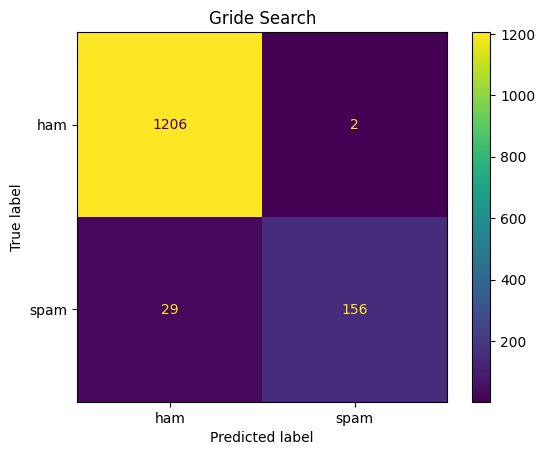

 Accuracy is 0.9777458722182341
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.84      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Gride Search')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred)}")
print(classification_report(y_test,y_pred))